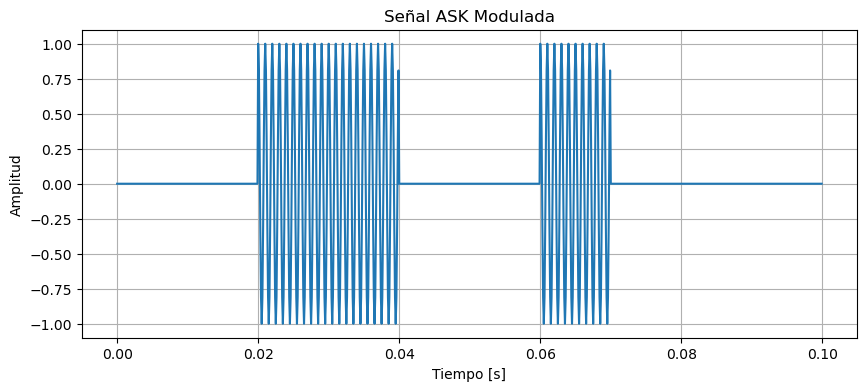

Bits transmitidos:  [0 0 1 1 0 0 1 0 0 0]
Bits recibidos:     [0, 0, 1, 1, 0, 0, 1, 0, 0, 0]


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000  # Frecuencia de muestreo
fc = 1000   # Frecuencia de la portadora
Tb = 0.01   # Duración de cada bit
N = 10      # Número de bits

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Tiempo
t = np.arange(0, N*Tb, 1/fs)

# Señal modulada ASK
signal = np.array([])
for bit in bits:
    t_bit = np.arange(0, Tb, 1/fs)
    if bit == 1:
        s = np.cos(2 * np.pi * fc * t_bit)
    else:
        s = np.zeros(len(t_bit))
    signal = np.concatenate((signal, s))

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal ASK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Demodulación
demod_bits = []
for i in range(N):
    t_bit = t[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    s_bit = signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    # Detector coherente
    producto = s_bit * np.cos(2 * np.pi * fc * t_bit)
    energia = np.sum(producto)
    if energia > 0:
        demod_bits.append(1)
    else:
        demod_bits.append(0)

print("Bits transmitidos: ", bits)
print("Bits recibidos:    ", demod_bits)


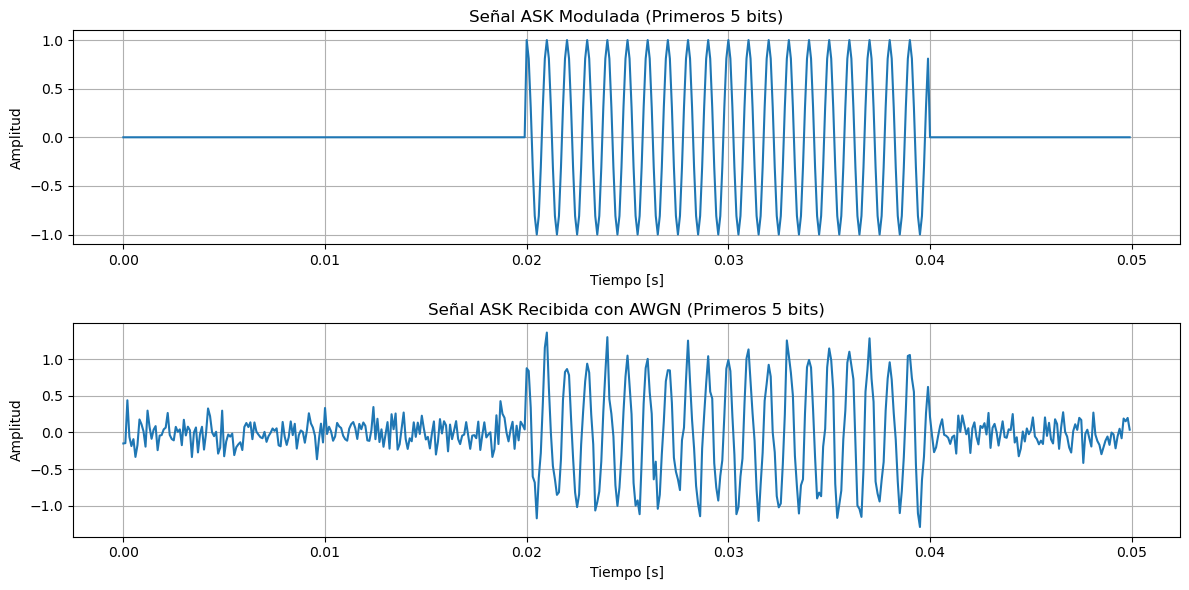

SNR (dB): 10
Bits transmitidos: 1000
Errores detectados: 263
Tasa de error de bit (BER): 0.26300


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000  # Frecuencia de muestreo
fc = 1000   # Frecuencia de la portadora
Tb = 0.01   # Duración de cada bit
N = 1000    # Número de bits (aumentado para una mejor estimación del BER)

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Tiempo
t = np.arange(0, N*Tb, 1/fs)

# Señal modulada ASK
signal = np.array([])
for bit in bits:
    t_bit = np.arange(0, Tb, 1/fs)
    if bit == 1:
        s = np.cos(2 * np.pi * fc * t_bit)
    else:
        s = np.zeros(len(t_bit))
    signal = np.concatenate((signal, s))

# Parámetros del canal
SNR_dB = 10  # Relación señal a ruido en decibelios
SNR = 10**(SNR_dB / 10)

# Potencia de la señal
P_signal = np.mean(signal**2)

# Potencia del ruido
P_noise = P_signal / SNR

# Generar ruido AWGN
noise = np.sqrt(P_noise) * np.random.normal(0, 1, len(signal))

# Señal recibida (señal + ruido)
received_signal = signal + noise

# Graficar señal modulada y señal recibida (primeros 5 bits)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t[:int(5*Tb*fs)], signal[:int(5*Tb*fs)])
plt.title('Señal ASK Modulada (Primeros 5 bits)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t[:int(5*Tb*fs)], received_signal[:int(5*Tb*fs)])
plt.title('Señal ASK Recibida con AWGN (Primeros 5 bits)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Demodulación
demod_bits = []
for i in range(N):
    t_bit = t[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    s_bit = received_signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    # Detector coherente
    producto = s_bit * np.cos(2 * np.pi * fc * t_bit)
    energia = np.sum(producto)
    if energia > 0:
        demod_bits.append(1)
    else:
        demod_bits.append(0)

# Cálculo del BER
errors = np.sum(bits != demod_bits)
BER = errors / N

print(f"SNR (dB): {SNR_dB}")
print(f"Bits transmitidos: {N}")
print(f"Errores detectados: {errors}")
print(f"Tasa de error de bit (BER): {BER:.5f}")


SNR (dB): 0, BER: 0.31020
SNR (dB): 2, BER: 0.26750
SNR (dB): 4, BER: 0.21560
SNR (dB): 6, BER: 0.15900
SNR (dB): 8, BER: 0.10620
SNR (dB): 10, BER: 0.05550
SNR (dB): 12, BER: 0.02290
SNR (dB): 14, BER: 0.00650
SNR (dB): 16, BER: 0.00120
SNR (dB): 18, BER: 0.00000
SNR (dB): 20, BER: 0.00000


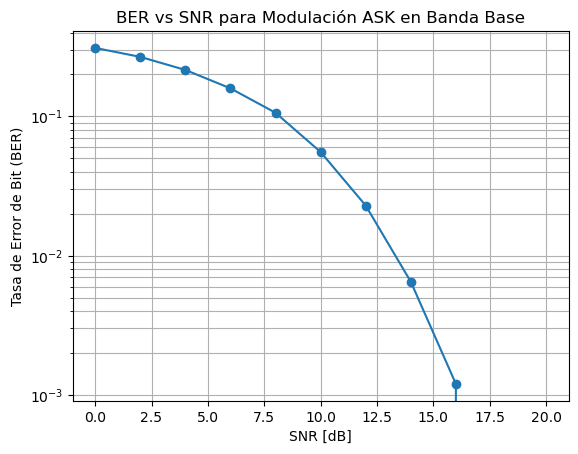

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000    # Frecuencia de muestreo
Tb = 0.01     # Duración de cada bit
N = 10000     # Número de bits

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Niveles de amplitud
A1 = 1        # Amplitud para bit '1'
A0 = 0        # Amplitud para bit '0'

# Señal transmitida
samples_per_bit = int(fs * Tb)
signal = np.zeros(N * samples_per_bit)
for i, bit in enumerate(bits):
    if bit == 1:
        signal[i * samples_per_bit : (i+1) * samples_per_bit] = A1

# Evaluar BER para diferentes SNR
SNR_dB_range = np.arange(0, 21, 2)
BER_values = []

for SNR_dB in SNR_dB_range:
    SNR_linear = 10**(SNR_dB / 10)
    # Potencia de la señal
    P_signal = (A1**2)
    # Potencia del ruido
    P_noise = P_signal / SNR_linear
    sigma_noise = np.sqrt(P_noise)
    # Generar ruido AWGN
    noise = sigma_noise * np.random.randn(N * samples_per_bit)
    # Señal recibida
    received_signal = signal + noise
    # Muestrear la señal recibida en el centro de cada bit
    sampled_signal = received_signal[ (np.arange(N) * samples_per_bit) + samples_per_bit // 2 ]
    # Umbral de decisión
    threshold = A1 / 2
    # Demodulación
    demod_bits = np.where(sampled_signal > threshold, 1, 0)
    # Calcular BER
    errors = np.sum(bits != demod_bits)
    BER = errors / N
    BER_values.append(BER)
    print(f"SNR (dB): {SNR_dB}, BER: {BER:.5f}")

# Graficar BER vs SNR
plt.figure()
plt.semilogy(SNR_dB_range, BER_values, '-o')
plt.title('BER vs SNR para Modulación ASK en Banda Base')
plt.xlabel('SNR [dB]')
plt.ylabel('Tasa de Error de Bit (BER)')
plt.grid(True, which='both')
plt.show()


SNR (dB): 0, BER: 0.42250
SNR (dB): 2, BER: 0.15870
SNR (dB): 4, BER: 0.00890
SNR (dB): 6, BER: 0.00000
SNR (dB): 8, BER: 0.00000
SNR (dB): 10, BER: 0.00000
SNR (dB): 12, BER: 0.00000
SNR (dB): 14, BER: 0.00000
SNR (dB): 16, BER: 0.00000
SNR (dB): 18, BER: 0.00000
SNR (dB): 20, BER: 0.00000


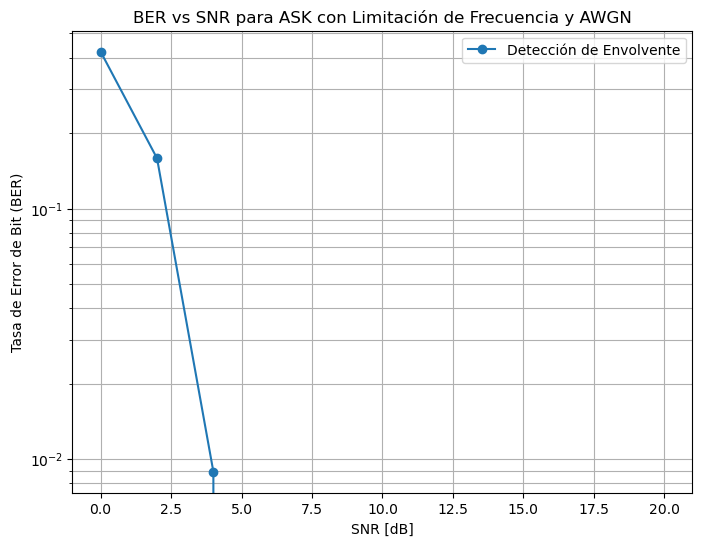

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert

# Parámetros
fs = 100000    # Frecuencia de muestreo
fc = 10000     # Frecuencia de la portadora
Tb = 0.001     # Duración de cada bit
N = 10000      # Número de bits

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Vectores de tiempo
t_bit = np.arange(0, Tb, 1/fs)
t = np.arange(0, N*Tb, 1/fs)

# Señal modulada ASK
A1 = 1.0       # Amplitud para bit '1'
A0 = 0.0       # Amplitud para bit '0'

signal = np.array([])
for bit in bits:
    if bit == 1:
        s = A1 * np.cos(2 * np.pi * fc * t_bit)
    else:
        s = A0 * np.cos(2 * np.pi * fc * t_bit)
    signal = np.concatenate((signal, s))

# Parámetros del filtro pasa banda (Limitación de Frecuencia)
f_low = fc - 5000   # Frecuencia de corte inferior
f_high = fc + 5000  # Frecuencia de corte superior
order = 4           # Orden del filtro

# Diseñar el filtro pasa banda
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Obtener coeficientes del filtro
b, a = butter_bandpass(f_low, f_high, fs, order)

# Aplicar el filtro a la señal transmitida
filtered_signal = lfilter(b, a, signal)

# Valores de SNR para evaluar
SNR_dB_range = np.arange(0, 21, 2)
BER_values = []

for SNR_dB in SNR_dB_range:
    SNR_linear = 10**(SNR_dB / 10)
    # Potencia de la señal
    P_signal = np.mean(filtered_signal**2)
    # Potencia del ruido
    P_noise = P_signal / SNR_linear
    # Generar AWGN
    noise = np.sqrt(P_noise) * np.random.randn(len(filtered_signal))
    # Señal recibida (señal filtrada + ruido)
    received_signal = filtered_signal + noise

    # Detección de envolvente
    analytic_signal = hilbert(received_signal)
    envelope = np.abs(analytic_signal)
    # Filtrar la envolvente para suavizar
    cutoff_freq = 2000  # Frecuencia de corte para suavizar la envolvente
    b_lp, a_lp = butter(4, cutoff_freq / (0.5 * fs), btype='low')
    envelope_filtered = lfilter(b_lp, a_lp, envelope)

    # Decisión de bits basándose en muestrear la envolvente en el centro de cada bit
    demod_bits = []
    samples_per_bit = len(t_bit)
    for i in range(N):
        # Muestrear en el centro del período de bit
        sample_index = int(i * samples_per_bit + samples_per_bit / 2)
        if sample_index >= len(envelope_filtered):
            break
        sample_value = envelope_filtered[sample_index]
        # Umbral de decisión
        threshold = A1 / 2  # La mitad de la amplitud del bit '1'
        if sample_value > threshold:
            demod_bits.append(1)
        else:
            demod_bits.append(0)

    # Calcular BER
    errors = np.sum(bits[:len(demod_bits)] != demod_bits)
    BER = errors / len(demod_bits)
    BER_values.append(BER)
    print(f"SNR (dB): {SNR_dB}, BER: {BER:.5f}")

# Graficar BER vs SNR
plt.figure(figsize=(8, 6))
plt.semilogy(SNR_dB_range, BER_values, '-o', label='Detección de Envolvente')
plt.title('BER vs SNR para ASK con Limitación de Frecuencia y AWGN')
plt.xlabel('SNR [dB]')
plt.ylabel('Tasa de Error de Bit (BER)')
plt.grid(True, which='both')
plt.legend()
plt.show()


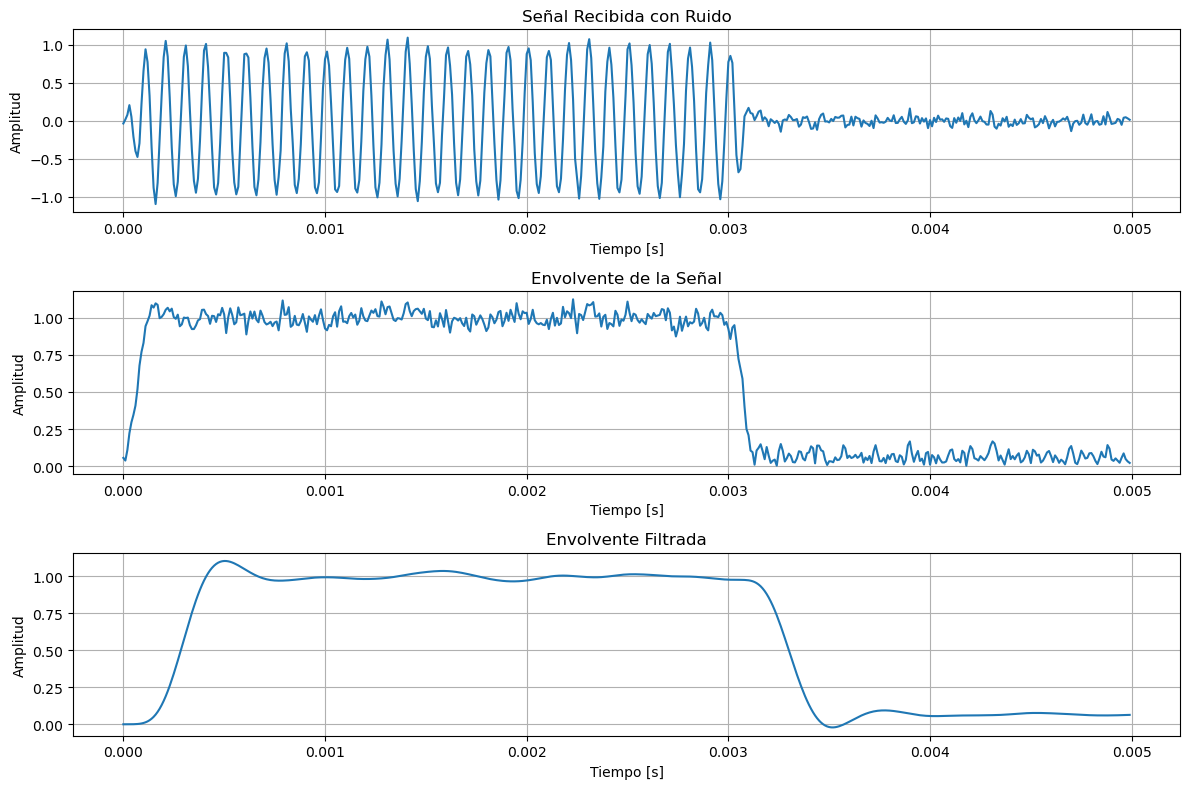

In [40]:
# Seleccionar un segmento de la señal para graficar (por ejemplo, los primeros 5 bits)
start = 0
end = int(5 * len(t_bit))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t[start:end], received_signal[start:end])
plt.title('Señal Recibida con Ruido')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t[start:end], envelope[start:end])
plt.title('Envolvente de la Señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t[start:end], envelope_filtered[start:end])
plt.title('Envolvente Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


SNR (dB): 0, BER: 0.49820
SNR (dB): 2, BER: 0.49810
SNR (dB): 4, BER: 0.49410
SNR (dB): 6, BER: 0.42420
SNR (dB): 8, BER: 0.16830
SNR (dB): 10, BER: 0.01030
SNR (dB): 12, BER: 0.00000
SNR (dB): 14, BER: 0.00000
SNR (dB): 16, BER: 0.00000
SNR (dB): 18, BER: 0.00000
SNR (dB): 20, BER: 0.00000


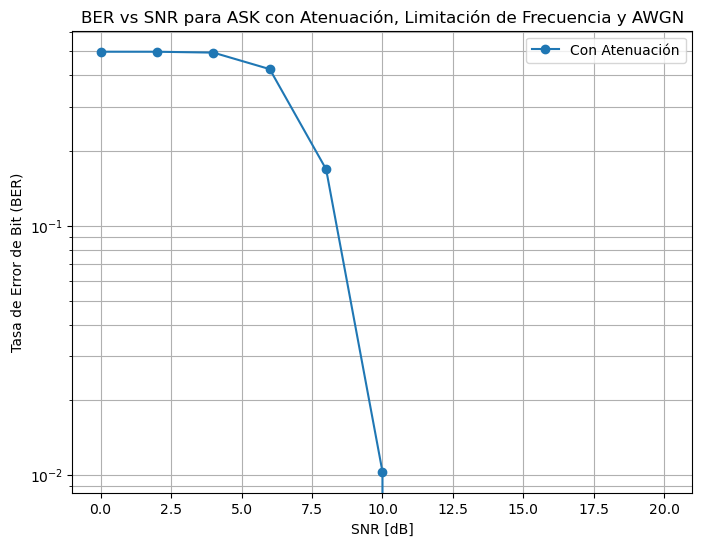

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert

# Parámetros
fs = 100000    # Frecuencia de muestreo
fc = 10000     # Frecuencia de la portadora
Tb = 0.001     # Duración de cada bit
N = 10000      # Número de bits

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Vectores de tiempo
t_bit = np.arange(0, Tb, 1/fs)
t = np.arange(0, N*Tb, 1/fs)

# Señal modulada ASK
A1 = 1.0       # Amplitud para bit '1'
A0 = 0.0       # Amplitud para bit '0'

signal = np.array([])
for bit in bits:
    if bit == 1:
        s = A1 * np.cos(2 * np.pi * fc * t_bit)
    else:
        s = A0 * np.cos(2 * np.pi * fc * t_bit)
    signal = np.concatenate((signal, s))

# Parámetros del filtro pasa banda (Limitación de Frecuencia)
f_low = fc - 5000   # Frecuencia de corte inferior
f_high = fc + 5000  # Frecuencia de corte superior
order = 4           # Orden del filtro

# Diseñar el filtro pasa banda
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Obtener coeficientes del filtro
b, a = butter_bandpass(f_low, f_high, fs, order)

# Aplicar el filtro a la señal transmitida
filtered_signal = lfilter(b, a, signal)

# **Agregar Atenuación**
alpha = 0.5  # Factor de atenuación (por ejemplo, 0.5 equivale a una atenuación de -6 dB)
attenuated_signal = alpha * filtered_signal

# Valores de SNR para evaluar
SNR_dB_range = np.arange(0, 21, 2)
BER_values = []

for SNR_dB in SNR_dB_range:
    SNR_linear = 10**(SNR_dB / 10)
    # **Calcular la potencia del ruido basándose en la señal sin atenuación**
    P_signal_original = np.mean(filtered_signal**2)
    P_noise = P_signal_original / SNR_linear
    # Generar AWGN
    noise = np.sqrt(P_noise) * np.random.randn(len(attenuated_signal))
    # Señal recibida (señal atenuada + ruido)
    received_signal = attenuated_signal + noise

    # Detección de envolvente
    analytic_signal = hilbert(received_signal)
    envelope = np.abs(analytic_signal)
    # Filtrar la envolvente para suavizar
    cutoff_freq = 2000  # Frecuencia de corte para suavizar la envolvente
    b_lp, a_lp = butter(4, cutoff_freq / (0.5 * fs), btype='low')
    envelope_filtered = lfilter(b_lp, a_lp, envelope)

    # Decisión de bits basándose en muestrear la envolvente en el centro de cada bit
    demod_bits = []
    samples_per_bit = len(t_bit)
    for i in range(N):
        # Muestrear en el centro del período de bit
        sample_index = int(i * samples_per_bit + samples_per_bit / 2)
        if sample_index >= len(envelope_filtered):
            break
        sample_value = envelope_filtered[sample_index]
        # **Ajustar el umbral según la atenuación**
        threshold = (A1 * alpha) / 2
        if sample_value > threshold:
            demod_bits.append(1)
        else:
            demod_bits.append(0)

    # Calcular BER
    errors = np.sum(bits[:len(demod_bits)] != demod_bits)
    BER = errors / len(demod_bits)
    BER_values.append(BER)
    print(f"SNR (dB): {SNR_dB}, BER: {BER:.5f}")

# Graficar BER vs SNR
plt.figure(figsize=(8, 6))
plt.semilogy(SNR_dB_range, BER_values, '-o', label='Con Atenuación')
plt.title('BER vs SNR para ASK con Atenuación, Limitación de Frecuencia y AWGN')
plt.xlabel('SNR [dB]')
plt.ylabel('Tasa de Error de Bit (BER)')
plt.grid(True, which='both')
plt.legend()
plt.show()


SNR (dB): 0, BER Coherente: 0.30180, BER No Coherente: 0.50270
SNR (dB): 2, BER Coherente: 0.31320, BER No Coherente: 0.50260
SNR (dB): 4, BER Coherente: 0.32820, BER No Coherente: 0.49850
SNR (dB): 6, BER Coherente: 0.33830, BER No Coherente: 0.42880
SNR (dB): 8, BER Coherente: 0.35180, BER No Coherente: 0.15930
SNR (dB): 10, BER Coherente: 0.36480, BER No Coherente: 0.01050
SNR (dB): 12, BER Coherente: 0.37020, BER No Coherente: 0.00000
SNR (dB): 14, BER Coherente: 0.37620, BER No Coherente: 0.00000
SNR (dB): 16, BER Coherente: 0.37970, BER No Coherente: 0.00000
SNR (dB): 18, BER Coherente: 0.37950, BER No Coherente: 0.00000
SNR (dB): 20, BER Coherente: 0.37860, BER No Coherente: 0.00000


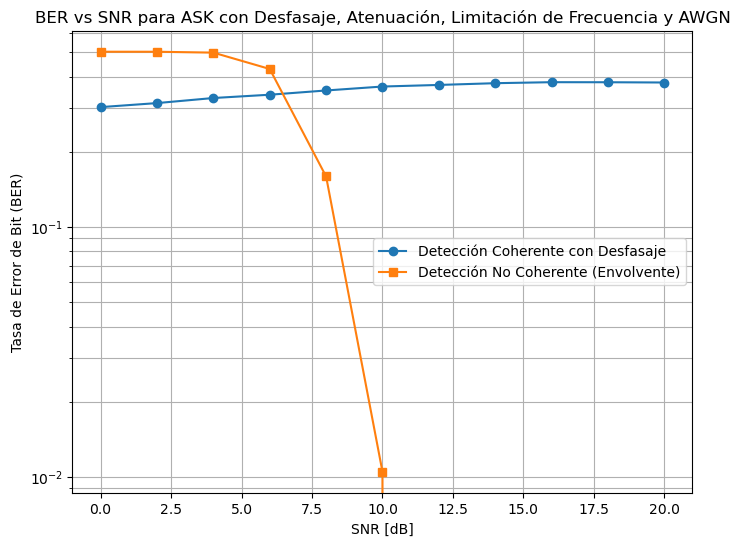

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert

# Parámetros
fs = 100000    # Frecuencia de muestreo
fc = 10000     # Frecuencia de la portadora
Tb = 0.001     # Duración de cada bit
N = 10000      # Número de bits

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Vectores de tiempo
t_bit = np.arange(0, Tb, 1/fs)
t = np.arange(0, N*Tb, 1/fs)

# Señal modulada ASK
A1 = 1.0       # Amplitud para bit '1'
A0 = 0.0       # Amplitud para bit '0'

signal = np.array([])
for bit in bits:
    if bit == 1:
        s = A1 * np.cos(2 * np.pi * fc * t_bit)
    else:
        s = A0 * np.cos(2 * np.pi * fc * t_bit)
    signal = np.concatenate((signal, s))

# Parámetros del filtro pasa banda (Limitación de Frecuencia)
f_low = fc - 5000   # Frecuencia de corte inferior
f_high = fc + 5000  # Frecuencia de corte superior
order = 4           # Orden del filtro

# Diseñar el filtro pasa banda
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Obtener coeficientes del filtro
b, a = butter_bandpass(f_low, f_high, fs, order)

# Aplicar el filtro a la señal transmitida
filtered_signal = lfilter(b, a, signal)

# Agregar Atenuación
alpha = 0.5  # Factor de atenuación
attenuated_signal = alpha * filtered_signal

# Agregar Desfasaje
phi = np.deg2rad(45)  # Desfasaje en radianes (por ejemplo, 45 grados)

# Aplicar el desfasaje manteniendo la señal real
s_hilbert = np.imag(hilbert(attenuated_signal))
attenuated_signal_with_phase = attenuated_signal * np.cos(phi) - s_hilbert * np.sin(phi)

# Valores de SNR para evaluar
SNR_dB_range = np.arange(0, 21, 2)
BER_values_coherent = []
BER_values_noncoherent = []

for SNR_dB in SNR_dB_range:
    SNR_linear = 10**(SNR_dB / 10)
    # Calcular la potencia del ruido basándose en la señal sin atenuación
    P_signal_original = np.mean(filtered_signal**2)
    P_noise = P_signal_original / SNR_linear
    # Generar AWGN
    noise = np.sqrt(P_noise) * np.random.randn(len(attenuated_signal))
    # Señal recibida (señal atenuada y desfazada + ruido)
    received_signal = attenuated_signal_with_phase + noise

    # Detección Coherente
    demod_bits_coherent = []
    samples_per_bit = len(t_bit)
    for i in range(N):
        s_bit = received_signal[i*samples_per_bit:(i+1)*samples_per_bit]
        # Detector coherente
        producto = s_bit * (2 * np.cos(2 * np.pi * fc * t_bit))
        energia = np.sum(producto)
        # Umbral de decisión
        threshold = 0  # Umbral en cero
        if energia > threshold:
            demod_bits_coherent.append(1)
        else:
            demod_bits_coherent.append(0)

    # Detección No Coherente (Envolvente)
    # Detección de envolvente
    analytic_signal = hilbert(received_signal)
    envelope = np.abs(analytic_signal)
    # Filtrar la envolvente para suavizar
    cutoff_freq = 2000  # Frecuencia de corte para suavizar la envolvente
    b_lp, a_lp = butter(4, cutoff_freq / (0.5 * fs), btype='low')
    envelope_filtered = lfilter(b_lp, a_lp, envelope)

    # Decisión de bits basándose en muestrear la envolvente en el centro de cada bit
    demod_bits_noncoherent = []
    for i in range(N):
        # Muestrear en el centro del período de bit
        sample_index = int(i * samples_per_bit + samples_per_bit / 2)
        if sample_index >= len(envelope_filtered):
            break
        sample_value = envelope_filtered[sample_index]
        # Umbral de decisión ajustado
        threshold_env = (A1 * alpha) / 2
        if sample_value > threshold_env:
            demod_bits_noncoherent.append(1)
        else:
            demod_bits_noncoherent.append(0)

    # Calcular BER para detección coherente
    errors_coherent = np.sum(bits[:len(demod_bits_coherent)] != demod_bits_coherent)
    BER_coherent = errors_coherent / len(demod_bits_coherent)
    BER_values_coherent.append(BER_coherent)

    # Calcular BER para detección no coherente
    errors_noncoherent = np.sum(bits[:len(demod_bits_noncoherent)] != demod_bits_noncoherent)
    BER_noncoherent = errors_noncoherent / len(demod_bits_noncoherent)
    BER_values_noncoherent.append(BER_noncoherent)

    print(f"SNR (dB): {SNR_dB}, BER Coherente: {BER_coherent:.5f}, BER No Coherente: {BER_noncoherent:.5f}")

# Graficar BER vs SNR
plt.figure(figsize=(8, 6))
plt.semilogy(SNR_dB_range, BER_values_coherent, '-o', label='Detección Coherente con Desfasaje')
plt.semilogy(SNR_dB_range, BER_values_noncoherent, '-s', label='Detección No Coherente (Envolvente)')
plt.title('BER vs SNR para ASK con Desfasaje, Atenuación, Limitación de Frecuencia y AWGN')
plt.xlabel('SNR [dB]')
plt.ylabel('Tasa de Error de Bit (BER)')
plt.grid(True, which='both')
plt.legend()
plt.show()


FSK


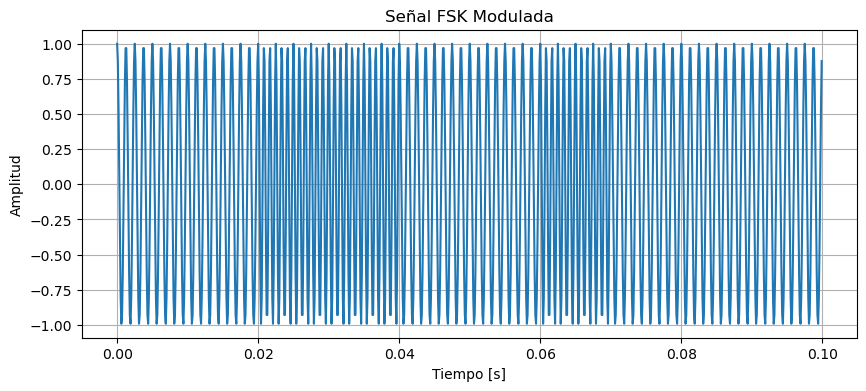

Bits transmitidos:  [0 0 1 1 0 0 1 0 0 0]
Bits recibidos:     [0, 0, 1, 1, 0, 0, 1, 0, 0, 0]


In [28]:
# Parámetros adicionales
f1 = 800   # Frecuencia para bit 0
f2 = 1200  # Frecuencia para bit 1

# Señal modulada FSK
signal = np.array([])
for bit in bits:
    t_bit = np.arange(0, Tb, 1/fs)
    if bit == 1:
        s = np.cos(2 * np.pi * f2 * t_bit)
    else:
        s = np.cos(2 * np.pi * f1 * t_bit)
    signal = np.concatenate((signal, s))

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal FSK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Demodulación
demod_bits = []
for i in range(N):
    t_bit = t[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    s_bit = signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    # Detectores coherentes para f1 y f2
    producto1 = s_bit * np.cos(2 * np.pi * f1 * t_bit)
    producto2 = s_bit * np.cos(2 * np.pi * f2 * t_bit)
    energia1 = np.sum(producto1)
    energia2 = np.sum(producto2)
    if energia2 > energia1:
        demod_bits.append(1)
    else:
        demod_bits.append(0)

print("Bits transmitidos: ", bits)
print("Bits recibidos:    ", demod_bits)


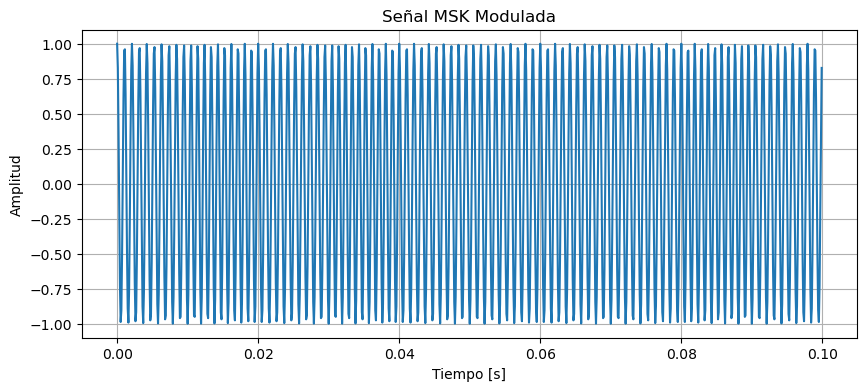

Bits transmitidos:  [0 1 0 1 0 0 0 0 1 0]
Bits recibidos (aprox):     [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [3]:
# MSK es una forma especial de FSK donde la diferencia de frecuencia es la mitad de la velocidad de datos

# Parámetros
fd = 1/Tb  # Velocidad de datos
df = fd / 2
f1 = fc - df
f2 = fc + df

# Señal modulada MSK
signal = np.array([])
phase = 0
for bit in bits:
    t_bit = np.arange(0, Tb, 1/fs)
    if bit == 1:
        freq = f2
    else:
        freq = f1
    s = np.cos(2 * np.pi * freq * t_bit + phase)
    phase += 2 * np.pi * (freq - fc) * Tb
    signal = np.concatenate((signal, s))

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal MSK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Demodulación requiere un detector coherente especializado
# Aquí simplificaremos usando un filtro adaptado (solo como ejemplo)

# Demodulación simplificada (no exacta)
demod_bits = []
for i in range(N):
    s_bit = signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    energia = np.sum(s_bit)
    if energia > 0:
        demod_bits.append(1)
    else:
        demod_bits.append(0)

print("Bits transmitidos: ", bits)
print("Bits recibidos (aprox):    ", demod_bits)


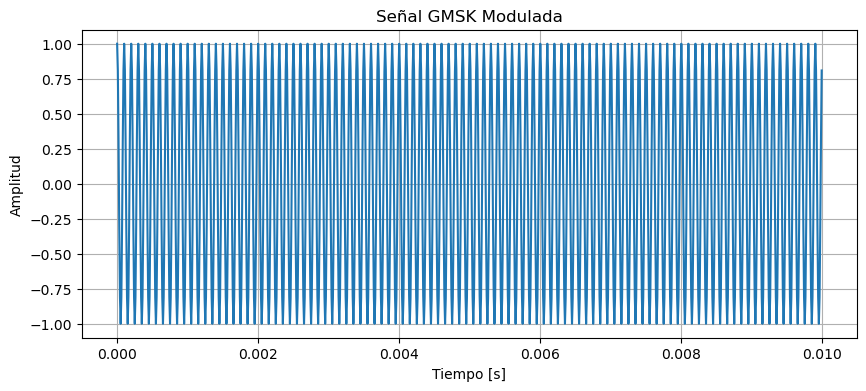

Bits transmitidos:  [0 0 0 0 0 1 1 1 1 1]
Bits recibidos (aprox):     [0 1 1 1 1 1 1 1 1 1]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, hilbert
from scipy.signal.windows import gaussian

# Parámetros
fs = 100000  # Frecuencia de muestreo
fc = 10000   # Frecuencia de la portadora
Tb = 0.001   # Duración de cada bit
N = 10       # Número de bits

# Generar bits (usando los bits proporcionados para probar)
bits = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Mapear bits a niveles NRZ polar (-1 y 1)
nrz = 2 * bits - 1  # 0 -> -1, 1 -> 1

# Parámetros del filtro Gaussiano
BT = 0.3
samples_per_bit = int(Tb * fs)
span = 4  # Duración del filtro en múltiplos de Tb
Nf = int(span * samples_per_bit)
std_gauss = samples_per_bit / (2 * np.pi * BT)
h = gaussian(Nf, std=std_gauss)

# Normalizar el filtro
h = h / np.sum(h)

# Expandir la señal NRZ al tamaño de muestreo
nrz_upsampled = np.repeat(nrz, samples_per_bit)

# Filtrar la señal NRZ con el filtro Gaussiano
nrz_filtered = convolve(nrz_upsampled, h, mode='same')

# Integrar la señal filtrada para obtener la fase acumulada
phase = np.cumsum(nrz_filtered) / fs * np.pi

# Tiempo total
t = np.arange(len(phase)) / fs

# Señal GMSK modulada
signal = np.cos(2 * np.pi * fc * t + phase)

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t[:2000], signal[:2000])
plt.title('Señal GMSK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Demodulación

# Calcular la fase instantánea de la señal recibida
analytic_signal = hilbert(signal)
inst_phase = np.unwrap(np.angle(analytic_signal))

# Muestrear la fase en los centros de los símbolos
symbol_indices = np.arange(samples_per_bit//2, len(inst_phase), samples_per_bit)
sampled_phase = inst_phase[symbol_indices]

# Calcular la diferencia de fase entre símbolos consecutivos
phase_diff = np.diff(sampled_phase)

# Decisión de bits basándose en la diferencia de fase
demod_bits = (phase_diff > 0).astype(int)

# Ajustar la longitud de demod_bits
# Asumimos que el primer bit es igual al transmitido
demod_bits = np.insert(demod_bits, 0, bits[0])

print("Bits transmitidos: ", bits)
print("Bits recibidos (aprox):    ", demod_bits)


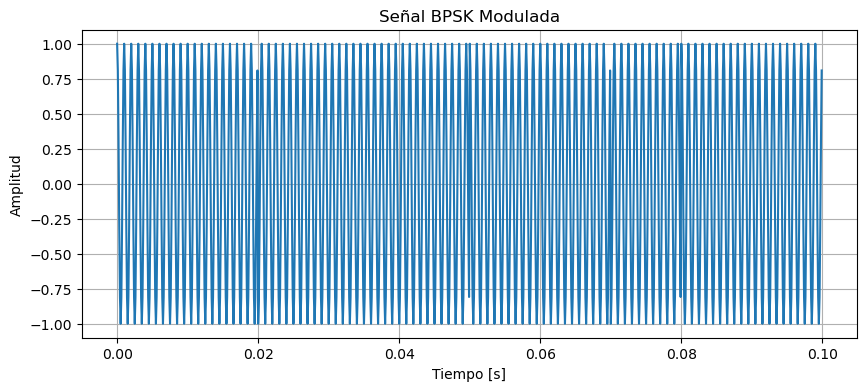

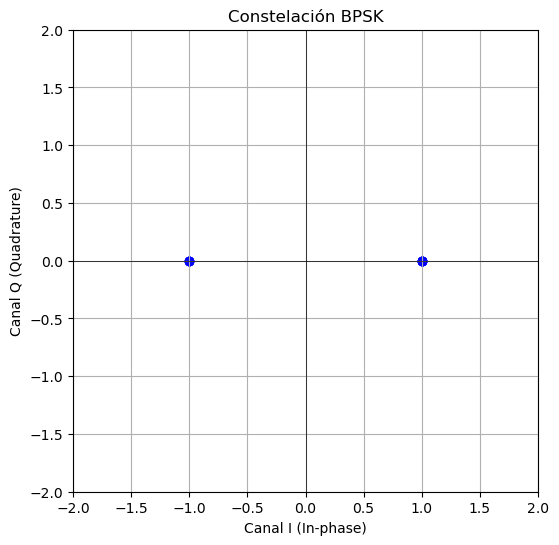

Bits transmitidos:  [1 1 0 0 0 1 1 0 1 1]
Bits recibidos:     [1, 1, 0, 0, 0, 1, 1, 0, 1, 1]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000  # Frecuencia de muestreo
fc = 1000   # Frecuencia de la portadora
Tb = 0.01   # Duración de cada bit
N = 10      # Número de bits

# Generar bits aleatorios
bits = np.random.randint(0, 2, N)

# Señal modulada BPSK
signal = np.array([])
constellation_I = []
constellation_Q = []
for bit in bits:
    t_bit = np.arange(0, Tb, 1/fs)
    s = (2*bit - 1) * np.cos(2 * np.pi * fc * t_bit)
    signal = np.concatenate((signal, s))
    # Extraer muestras para la constelación
    constellation_I.append((2*bit - 1))
    constellation_Q.append(0)

# Tiempo total
t = np.arange(0, N*Tb, 1/fs)

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal BPSK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar constelación
plt.figure(figsize=(6, 6))
plt.scatter(constellation_I, constellation_Q, color='blue')
plt.title('Constelación BPSK')
plt.xlabel('Canal I (In-phase)')
plt.ylabel('Canal Q (Quadrature)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

# Demodulación
demod_bits = []
for i in range(N):
    t_bit = t[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    s_bit = signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    producto = s_bit * np.cos(2 * np.pi * fc * t_bit)
    energia = np.sum(producto)
    if energia > 0:
        demod_bits.append(1)
    else:
        demod_bits.append(0)

print("Bits transmitidos: ", bits)
print("Bits recibidos:    ", demod_bits)


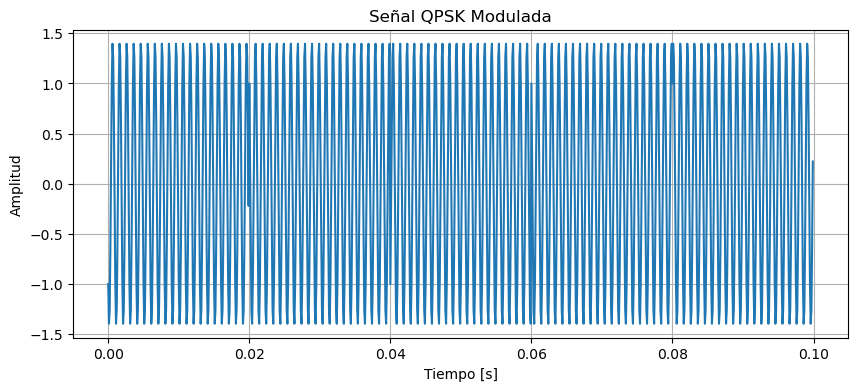

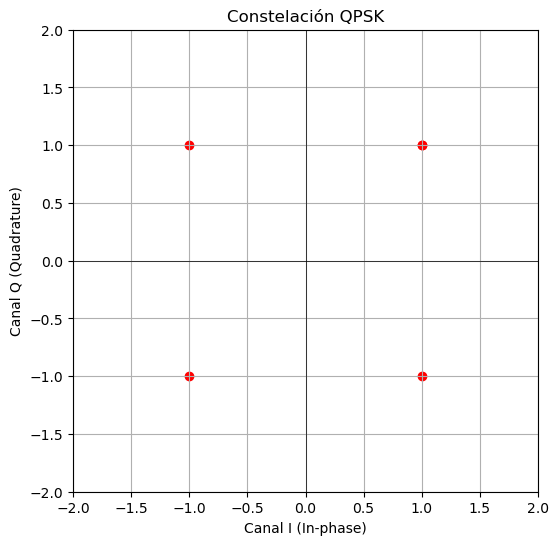

Bits transmitidos:  [0 1 1 1 0 0 1 1 1 0]
Bits recibidos:     [0, 1, 1, 1, 0, 0, 1, 1, 1, 0]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000  # Frecuencia de muestreo
fc = 1000   # Frecuencia de la portadora
Tb = 0.01   # Duración de cada bit
N = 10      # Número de bits (asegurarse de que sea par)
if N % 2 != 0:
    N += 1
    bits = np.random.randint(0, 2, N)
else:
    bits = np.random.randint(0, 2, N)

Tb_sym = 2 * Tb  # Duración del símbolo QPSK

# Agrupar bits en símbolos
symbols = bits.reshape((int(N/2), 2))

# Señal modulada QPSK
signal = np.array([])
constellation_I = []
constellation_Q = []
for b in symbols:
    t_sym = np.arange(0, Tb_sym, 1/fs)
    I = 2*b[0] - 1
    Q = 2*b[1] - 1
    s = I * np.cos(2 * np.pi * fc * t_sym) - Q * np.sin(2 * np.pi * fc * t_sym)
    signal = np.concatenate((signal, s))
    # Extraer muestras para la constelación
    constellation_I.append(I)
    constellation_Q.append(Q)

# Tiempo ajustado para símbolos
t = np.arange(0, len(symbols)*Tb_sym, 1/fs)

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal QPSK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar constelación
plt.figure(figsize=(6, 6))
plt.scatter(constellation_I, constellation_Q, color='red')
plt.title('Constelación QPSK')
plt.xlabel('Canal I (In-phase)')
plt.ylabel('Canal Q (Quadrature)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

# Demodulación
demod_bits = []
for i in range(len(symbols)):
    t_sym = t[i*int(Tb_sym*fs):(i+1)*int(Tb_sym*fs)]
    s_sym = signal[i*int(Tb_sym*fs):(i+1)*int(Tb_sym*fs)]
    # Canal I
    producto_I = s_sym * np.cos(2 * np.pi * fc * t_sym)
    energia_I = np.sum(producto_I)
    # Canal Q
    producto_Q = -s_sym * np.sin(2 * np.pi * fc * t_sym)
    energia_Q = np.sum(producto_Q)
    bit_I = 1 if energia_I > 0 else 0
    bit_Q = 1 if energia_Q > 0 else 0
    demod_bits.extend([bit_I, bit_Q])

print("Bits transmitidos: ", bits)
print("Bits recibidos:    ", demod_bits)


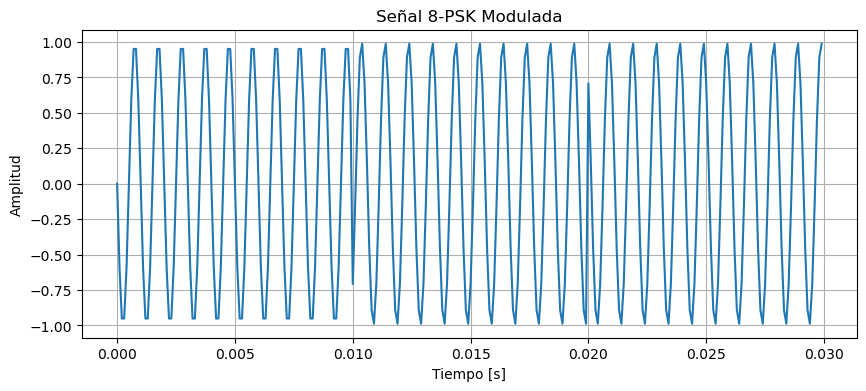

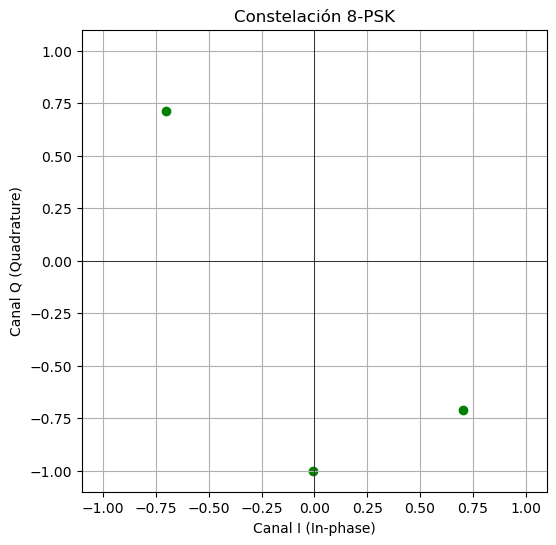

Bits transmitidos:  [0 1 0 1 0 1 0 0 1]
Bits recibidos:     [1, 1, 0, 0, 1, 1, 1, 1, 1]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000  # Frecuencia de muestreo
fc = 1000   # Frecuencia de la portadora
Tb = 0.01   # Duración de cada símbolo
N = 9       # Número de bits (múltiplo de 3)
bits = np.random.randint(0, 2, N)

# Asegurarse de que el número de bits sea múltiplo de 3
while len(bits) % 3 != 0:
    bits = np.append(bits, 0)

# Agrupar bits en símbolos de 3 bits
symbols = bits.reshape((-1, 3))

# Señal modulada 8-PSK
signal = np.array([])
M = 8  # Número de fases
mod_I = []
mod_Q = []
for b in symbols:
    t_sym = np.arange(0, Tb, 1/fs)
    # Convertir bits a decimal
    decimal = b[0]*4 + b[1]*2 + b[2]*1
    phase = (2 * np.pi * decimal) / M
    # Modulación
    s = np.cos(2 * np.pi * fc * t_sym + phase)
    signal = np.concatenate((signal, s))
    # Componentes I y Q teóricas
    I = np.cos(phase)
    Q = np.sin(phase)
    mod_I.append(I)
    mod_Q.append(Q)

# Tiempo ajustado
t = np.arange(0, len(symbols)*Tb, 1/fs)

# Demodulación
demod_bits = []
demod_I = []
demod_Q = []
for i in range(len(symbols)):
    t_sym = t[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    s_sym = signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    # Mezclar con coseno y seno
    producto_I = s_sym * np.cos(2 * np.pi * fc * t_sym)
    producto_Q = s_sym * np.sin(2 * np.pi * fc * t_sym)
    # Integrar para obtener las componentes I y Q
    I_energia = (2 / Tb) * np.trapz(producto_I, t_sym)
    Q_energia = (2 / Tb) * np.trapz(producto_Q, t_sym)
    # Normalizar
    norm = np.sqrt(I_energia**2 + Q_energia**2)
    I_energia_norm = I_energia / norm
    Q_energia_norm = Q_energia / norm
    demod_I.append(I_energia_norm)
    demod_Q.append(Q_energia_norm)
    # Estimar fase
    phase_est = np.arctan2(Q_energia, I_energia)
    if phase_est < 0:
        phase_est += 2 * np.pi
    # Decisión del símbolo
    decimal_est = int(np.round(phase_est * M / (2 * np.pi)) % M)
    bits_est = [int(x) for x in format(decimal_est, '03b')]
    demod_bits.extend(bits_est)

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal 8-PSK Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar constelación (después de la demodulación)
plt.figure(figsize=(6, 6))
plt.scatter(demod_I, demod_Q, color='green')
plt.title('Constelación 8-PSK')
plt.xlabel('Canal I (In-phase)')
plt.ylabel('Canal Q (Quadrature)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.show()

print("Bits transmitidos: ", bits.astype(int))
print("Bits recibidos:    ", demod_bits)


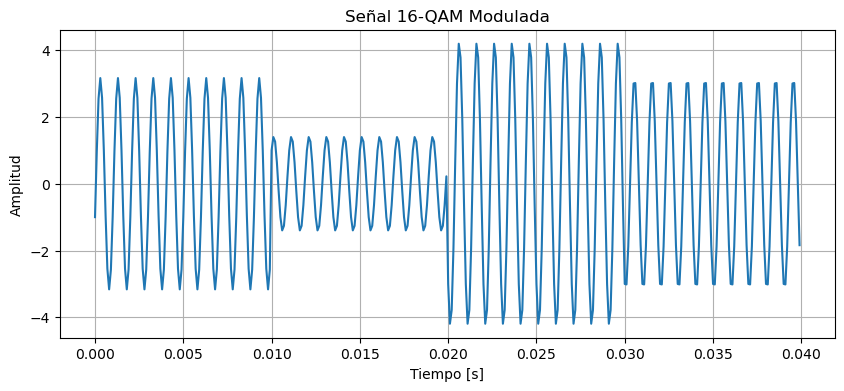

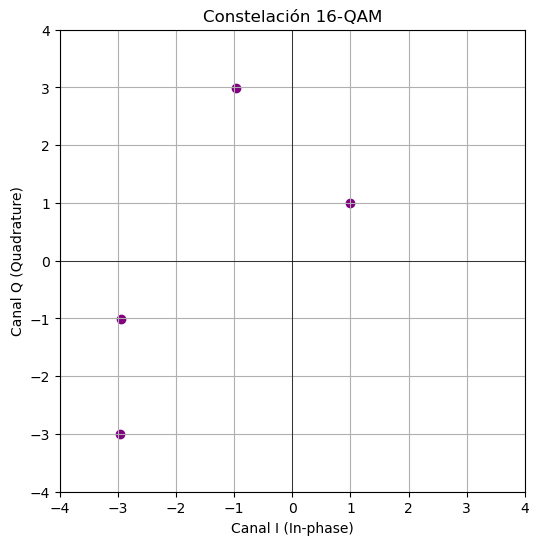

Bits transmitidos:  [0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1]
Bits recibidos:     [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10000  # Frecuencia de muestreo
fc = 1000   # Frecuencia de la portadora
Tb = 0.01   # Duración de cada símbolo
N = 16      # Número de bits (múltiplo de 4)
bits = np.random.randint(0, 2, N)

# Asegurarse de que el número de bits sea múltiplo de 4
while len(bits) % 4 != 0:
    bits = np.append(bits, 0)

# Agrupar bits en símbolos de 4 bits
symbols = bits.reshape((-1, 4))

# Mapeo de bits a amplitudes (Gray code mapping)
mapping = {
    (0,0): -3,
    (0,1): -1,
    (1,1): 1,
    (1,0): 3
}

# Señal modulada 16-QAM
signal = np.array([])
mod_I = []
mod_Q = []
for b in symbols:
    t_sym = np.arange(0, Tb, 1/fs)
    I_bits = (b[0], b[1])
    Q_bits = (b[2], b[3])
    I = mapping[I_bits]
    Q = mapping[Q_bits]
    s = I * np.cos(2 * np.pi * fc * t_sym) + Q * np.sin(2 * np.pi * fc * t_sym)
    signal = np.concatenate((signal, s))
    mod_I.append(I)
    mod_Q.append(Q)

# Tiempo ajustado
t = np.arange(0, len(symbols)*Tb, 1/fs)

# Demodulación
demod_bits = []
demod_I = []
demod_Q = []
for i in range(len(symbols)):
    t_sym = t[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    s_sym = signal[i*int(Tb*fs):(i+1)*int(Tb*fs)]
    # Mezclar con coseno y seno
    producto_I = s_sym * np.cos(2 * np.pi * fc * t_sym)
    producto_Q = s_sym * np.sin(2 * np.pi * fc * t_sym)
    # Integrar para obtener las componentes I y Q
    I_energia = (2 / Tb) * np.trapz(producto_I, t_sym)
    Q_energia = (2 / Tb) * np.trapz(producto_Q, t_sym)
    demod_I.append(I_energia)
    demod_Q.append(Q_energia)
    # Decisión de nivel
    niveles = np.array([-3, -1, 1, 3])
    I_level = niveles[np.argmin(np.abs(I_energia - niveles))]
    Q_level = niveles[np.argmin(np.abs(Q_energia - niveles))]
    # Inversa del mapeo
    I_bits = list(mapping.keys())[list(mapping.values()).index(I_level)]
    Q_bits = list(mapping.keys())[list(mapping.values()).index(Q_level)]
    demod_bits.extend(I_bits + Q_bits)

# Graficar señal modulada
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Señal 16-QAM Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar constelación (después de la demodulación)
plt.figure(figsize=(6, 6))
plt.scatter(demod_I, demod_Q, color='purple')
plt.title('Constelación 16-QAM')
plt.xlabel('Canal I (In-phase)')
plt.ylabel('Canal Q (Quadrature)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

print("Bits transmitidos: ", bits.astype(int))
print("Bits recibidos:    ", demod_bits)
